In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

file_path='2017-PART_I_AND_II_CRIMES.csv'
data=pd.read_csv(file_path, sep=',', header=0, delimiter=',',encoding='iso-8859-1')

In [2]:
#Check the dataset
data.head()

,LURN_SAK,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,STAT,STAT_DESC,ADDRESS,STREET,CITY,ZIP,INCIDENT_ID,REPORTING_DISTRICT,SEQ,GANG_RELATED,UNIT_ID,UNIT_NAME,DELETED
0,18288959,08/03/2017 11:53:00 PM,08/03/2017,VEHICLE / BOATING LAWS,255,VEHICLE AND BOATING LAWS: Misdemeanor,"4300 ROSEMEAD BLVD, ROSEMEAD, CA 91770",4300 ROSEMEAD BLVD,ROSEMEAD,91770.0,917-08914-0531,531,8914,NO,CA0190005,TEMPLE,N
1,18079991,03/07/2017 08:23:00 AM,03/07/2017,MISCELLANEOUS NON-CRIMINAL,720,"VEHICLE/BOATING LAWS, CITATIONS: Hazardous Cit...","CLARK AVE AND MAPLE ST, BELLFLOWER, CA 90706",CLARK AVE AND MAPLE ST,BELLFLOWER,90706.0,917-05086-1334,1334,5086,NO,CA0190013,LAKEWOOD,N
2,18215223,05/24/2017 09:20:00 AM,05/24/2017,MISCELLANEOUS NON-CRIMINAL,501,MISCELLANEOUS: Vehicle Repossessed,"11000 ALONDRA BLVD, CERRITOS, CA",11000 ALONDRA BLVD,CERRITOS,NaN,917-02607-2310,2310,2607,NO,CA01900R7,CERRITOS,N
3,18077911,03/04/2017 10:18:07 PM,03/04/2017,MISCELLANEOUS NON-CRIMINAL,687,"NON-CRIMINAL, CUSTODY INCIDENTS - Inmate Sick/...","11800 S ALAMEDA ST, LYNWOOD, CA 90262",11800 S ALAMEDA ST,LYNWOOD,90262.0,017-00612-5700,5700,612,NO,CA0190053,CRDF,N
4,18382253,10/31/2017 05:00:00 AM,10/31/2017,ACCIDENTS TRAFFIC/VEH./BOAT,471,"ACCIDENTS, TRAFFIC-VEHICLE OR BOAT: Accident, ...","10TH ST W AND AVENUE L, LANCASTER, CA",10TH ST W AND AVENUE L,LANCASTER,NaN,917-21237-1124,1124,21237,NO,CA0190024,LANCASTER,N


In [3]:
#Import the category and the score

category=pd.read_csv('category.csv', sep=',', header=0, delimiter=',')
category.head()

,Unnamed: 0,CATEGORY,crime,score
0,0,ACCIDENTS MISCELLANEOUS,1,4
1,1,ACCIDENTS TRAFFIC/VEH./BOAT,1,3
2,2,AGGRAVATED ASSAULT,1,10
3,3,ARSON,1,10
4,4,BURGLARY,1,8


In [30]:
# np.where(category[category['crime']==1]['category'] == data['CATEGORY'])

# clean non-relevent crime

crime = data[data['CATEGORY'] != 'MISCELLANEOUS NON-CRIMINAL'] 
crime = crime[crime['CATEGORY'] != 'MISDEMEANORS MISCELLANEOUS'] 
crime = crime[crime['CATEGORY'] != 'OFFENSES AGAINST FAMILY'] 
crime = crime[crime['CATEGORY'] != 'PERSONS DEAD'] 
crime = crime[crime['CATEGORY'] != 'PERSONS MISSING'] 
crime = crime[crime['CATEGORY'] != 'OFFENSES AGAINST FAMILY'] 
crime = crime[crime['CATEGORY'] != 'FRAUD AND NSF CHECKS'] 
crime = crime[crime['CATEGORY'] != 'GAMBLING'] 
crime = crime[crime['CATEGORY'] != 'FORGERY'] 
crime = crime[crime['CATEGORY'] != 'SUICIDE AND ATTEMPT'] 
crime = crime[crime['CATEGORY'] != 'VAGRANCY'] 
crime = crime[crime['CATEGORY'] != 'WARRANTS'] 
crime = crime[crime['CATEGORY'] != 'WEAPON LAWS'] 



In [31]:
# clean irrelevent column
crime = crime.dropna().drop(['DELETED','LURN_SAK','INCIDENT_ID','REPORTING_DISTRICT','SEQ','UNIT_ID'], axis=1)
print(len(np.unique(crime['STAT_DESC'])))
crime.head()


198


,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,STAT,STAT_DESC,ADDRESS,STREET,CITY,ZIP,GANG_RELATED,UNIT_NAME
0,08/03/2017 11:53:00 PM,08/03/2017,VEHICLE / BOATING LAWS,255,VEHICLE AND BOATING LAWS: Misdemeanor,"4300 ROSEMEAD BLVD, ROSEMEAD, CA 91770",4300 ROSEMEAD BLVD,ROSEMEAD,91770.0,NO,TEMPLE
9,04/16/2017 09:00:00 PM,04/16/2017,LARCENY THEFT,383,"THEFT, PETTY: Shoplifting (From Dept Store, Mk...","200 UNIVERSAL CITY PLAZA DR, UNIVERSAL CITY, C...",200 UNIVERSAL CITY PLAZA DR,UNIVERSAL CITY,91608.0,NO,WEST HOLLYWOOD
11,04/06/2017 05:15:00 AM,04/06/2017,LARCENY THEFT,85,GRAND THEFT: Auto Parts And Accessories,"9700 ZAMORA AVE, LOS ANGELES, CA 90002",9700 ZAMORA AVE,LOS ANGELES,90002.0,NO,CENTURY
12,05/17/2017 09:51:05 AM,05/17/2017,ACCIDENTS TRAFFIC/VEH./BOAT,472,"ACCIDENTS, TRAFFIC-VEHICLE OR BOAT: Traffic (N...","6100 ROSEMEAD BLVD, PICO RIVERA, CA 90660",6100 ROSEMEAD BLVD,PICO RIVERA,90660.0,NO,PICO RIVERA
16,06/08/2017 08:50:00 AM,06/08/2017,VEHICLE / BOATING LAWS,255,VEHICLE AND BOATING LAWS: Misdemeanor,"SIERRA HWY AND DOLAN WAY, SANTA CLARITA, CA 9...",SIERRA HWY AND DOLAN WAY,SANTA CLARITA,91351.0,NO,SANTA CLARITA VALLEY


In [32]:
#Change to standardized date and time 
crime['INCIDENT_DATE'] = pd.to_datetime(crime['INCIDENT_DATE'])

In [33]:
crime['hour'] = [i.hour for i in crime['INCIDENT_DATE']]

In [34]:
crime['daytime'] = (crime['hour'] < 18) & (crime['hour'] > 8)
crime['GANG_RELATED'] = crime['GANG_RELATED'].replace('YES',1.5)
crime['GANG_RELATED'] = crime['GANG_RELATED'].replace('NO',1)
crime['daytime'] = crime['daytime'].replace(True,1.5)
crime['daytime'] = crime['daytime'].replace(False,1)
crime.head()

,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,STAT,STAT_DESC,ADDRESS,STREET,CITY,ZIP,GANG_RELATED,UNIT_NAME,hour,daytime
0,2017-08-03 23:53:00,08/03/2017,VEHICLE / BOATING LAWS,255,VEHICLE AND BOATING LAWS: Misdemeanor,"4300 ROSEMEAD BLVD, ROSEMEAD, CA 91770",4300 ROSEMEAD BLVD,ROSEMEAD,91770.0,1.0,TEMPLE,23,1.0
9,2017-04-16 21:00:00,04/16/2017,LARCENY THEFT,383,"THEFT, PETTY: Shoplifting (From Dept Store, Mk...","200 UNIVERSAL CITY PLAZA DR, UNIVERSAL CITY, C...",200 UNIVERSAL CITY PLAZA DR,UNIVERSAL CITY,91608.0,1.0,WEST HOLLYWOOD,21,1.0
11,2017-04-06 05:15:00,04/06/2017,LARCENY THEFT,85,GRAND THEFT: Auto Parts And Accessories,"9700 ZAMORA AVE, LOS ANGELES, CA 90002",9700 ZAMORA AVE,LOS ANGELES,90002.0,1.0,CENTURY,5,1.0
12,2017-05-17 09:51:05,05/17/2017,ACCIDENTS TRAFFIC/VEH./BOAT,472,"ACCIDENTS, TRAFFIC-VEHICLE OR BOAT: Traffic (N...","6100 ROSEMEAD BLVD, PICO RIVERA, CA 90660",6100 ROSEMEAD BLVD,PICO RIVERA,90660.0,1.0,PICO RIVERA,9,1.5
16,2017-06-08 08:50:00,06/08/2017,VEHICLE / BOATING LAWS,255,VEHICLE AND BOATING LAWS: Misdemeanor,"SIERRA HWY AND DOLAN WAY, SANTA CLARITA, CA 9...",SIERRA HWY AND DOLAN WAY,SANTA CLARITA,91351.0,1.0,SANTA CLARITA VALLEY,8,1.0


In [35]:
# merge the crime score into the crime incedent reports table

crime2 = pd.merge(crime, category, left_on='CATEGORY', right_on='CATEGORY', how='left', sort=False)
#adjust the score with gang-related and daytime crime

crime2['adjusted_score'] = crime2['score'] 

In [71]:

crime2 = crime2.loc[(crime2['ZIP'] >= 90001) & (crime2['ZIP'] <= 93599)]
print(len(np.unique(crime2['ZIP'])))
freq = crime2.groupby(by=['ZIP']).sum()[['score','crime','adjusted_score']]
freq.head()

356


,score,crime,adjusted_score
ZIP,,,
90001.0,10576,1942,10576
90002.0,3392,631,3392
90003.0,164,36,164
90004.0,43,9,43
90005.0,40,11,40


In [72]:
#import the population by zipcode

zip_pop =pd.read_csv('pop-by-zip-code.csv', sep=',', header=0, delimiter=',')
zip_pop = zip_pop[['zip_code','y-2016']]


In [73]:
freq=freq.reset_index()
freq.head()

,ZIP,score,crime,adjusted_score
0,90001.0,10576,1942,10576
1,90002.0,3392,631,3392
2,90003.0,164,36,164
3,90004.0,43,9,43
4,90005.0,40,11,40


In [74]:
#change to float
zip_pop['zip_code']=zip_pop['zip_code']*1.0


In [75]:
d = zip_pop.set_index('zip_code')['y-2016'].to_dict()


In [76]:
#import the population 
freq['pop'] = freq['ZIP'].map(d)

In [77]:
freq 
freq['pop'].fillna(1, inplace=True)

In [78]:
freq['score/population'] = freq['adjusted_score']/freq['pop']
freq.head()

,ZIP,score,crime,adjusted_score,pop,score/population
0,90001.0,10576,1942,10576,57942.0,0.182527
1,90002.0,3392,631,3392,51826.0,0.065450
2,90003.0,164,36,164,70208.0,0.002336
3,90004.0,43,9,43,63095.0,0.000682
4,90005.0,40,11,40,39338.0,0.001017


In [79]:
freq.head()

,ZIP,score,crime,adjusted_score,pop,score/population
0,90001.0,10576,1942,10576,57942.0,0.182527
1,90002.0,3392,631,3392,51826.0,0.065450
2,90003.0,164,36,164,70208.0,0.002336
3,90004.0,43,9,43,63095.0,0.000682
4,90005.0,40,11,40,39338.0,0.001017


In [80]:
freq['log'] = np.log(freq['score/population'])

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [81]:
freq.head()

,ZIP,score,crime,adjusted_score,pop,score/population,log
0,90001.0,10576,1942,10576,57942.0,0.182527,-1.700855
1,90002.0,3392,631,3392,51826.0,0.065450,-2.726472
2,90003.0,164,36,164,70208.0,0.002336,-6.059351
3,90004.0,43,9,43,63095.0,0.000682,-7.291197
4,90005.0,40,11,40,39338.0,0.001017,-6.891067


In [82]:
from numpy import inf
freq['log'][freq['log'] == -inf] = -11
freq['log'][freq['log'] == inf] = -11


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


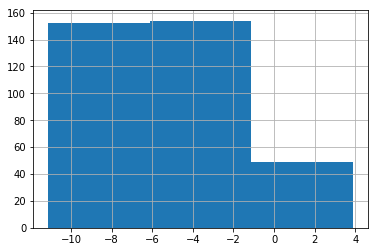

In [99]:
freq['log'].hist(bins=3)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
freq['level2'], bins = pd.qcut(freq['log'], 3,labels=[1,2,3],duplicates='drop', retbins=True)

In [91]:
freq.head()

,ZIP,score,crime,adjusted_score,pop,score/population,log,level2
0,90001.0,10576,1942,10576,57942.0,0.182527,-1.700855,3
1,90002.0,3392,631,3392,51826.0,0.065450,-2.726472,3
2,90003.0,164,36,164,70208.0,0.002336,-6.059351,2
3,90004.0,43,9,43,63095.0,0.000682,-7.291197,1
4,90005.0,40,11,40,39338.0,0.001017,-6.891067,1


In [92]:
freq.to_csv('safety_score_LA.csv', sep=',', encoding='utf-8')

In [98]:
freq['level2'].value_counts()

1    119
3    118
2    118
Name: level2, dtype: int64

In [106]:
print(freq['log'].quantile(q = 0.33))
print(freq['log'].quantile(q = 0.66))
print(freq['log'].quantile(q = 1))
print(bins)

-6.856087961172383
-2.9232717134667157
3.871201010907891
[-11.10731535  -6.83780041  -2.88807444   3.87120101]


In [109]:
pd.cut(freq['log'], bins, right=True,labels=[1,2,3]).value_counts()

3    118
2    118
1    118
Name: log, dtype: int64

In [111]:
import pickle
path = "./bins.pickle"
pickle.dump( bins, open(  path, "wb") )